In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [27]:
#Data Generate X,y
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    # print(X)
    y = 6*X+1+5*noise
    return X,y

# plt.scatter(X,y)
# print(X.mean())
# print(X.std())
# #plt.plot(X,y)
# plt.show()

In [28]:
X,y = generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


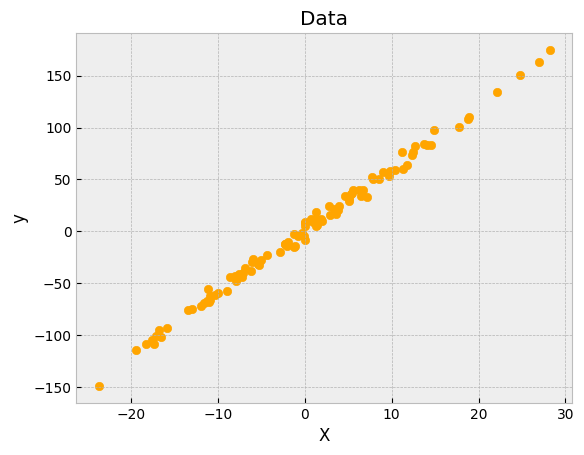

In [29]:
def plotData(X,y,color="orange",title="Data"):
    plt.scatter(X,y,c=color)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
plotData(X,y)

In [30]:
print(X.mean(),X.std())

0.3628589366921603 10.703229742595425


In [31]:
def normaliseData(X):
  X = (X-X.mean())/X.std()
  return X

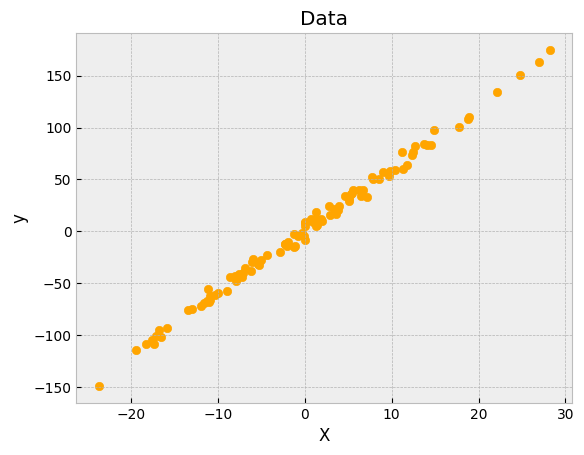

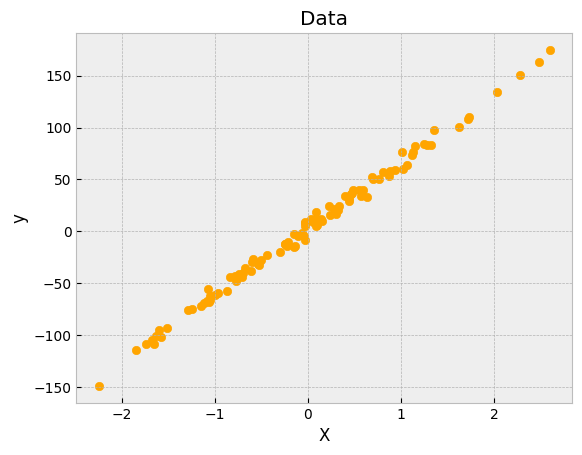

In [32]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [33]:
print(X.mean())
print(X.std())

2.55351295663786e-17
1.0


In [34]:
def trainTestSplit(X,y,split=0.8):
  m = X.shape[0]
  data = np.zeros((m,2))
  data[:,0] = X
  data[:,1] = y
  np.random.shuffle(data)
  splitIndex = int(m*split)
  XT = data[:splitIndex,0]
  yT = data[:splitIndex,1]
  Xt = data[splitIndex:,0]
  yt = data[splitIndex:,1]
  return XT,yT,Xt,yt


In [35]:
XT,yT,Xt,yt = trainTestSplit(X,y)
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


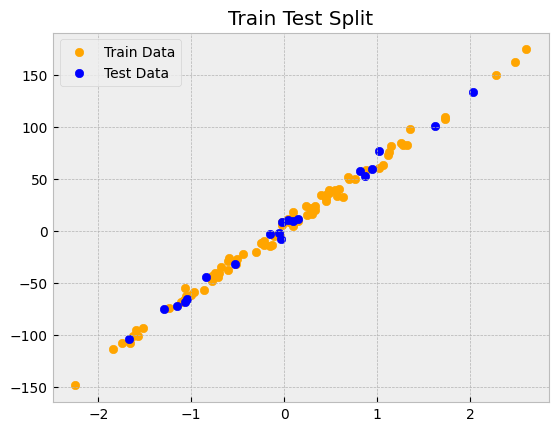

In [36]:
plt.scatter(XT,yT,color="orange",label="Train Data")
plt.scatter(Xt,yt,color="blue",label="Test Data")
plt.title("Train Test Split")
plt.legend()
plt.show()

In [37]:
#Hypothesis
def hypothesis(X,theta):
  return theta[0] + theta[1]*X

def error(X,y,theta):
  m = X.shape[0]
  e = 0
  for i in range(m):
    y_i = hypothesis(X[i],theta)
    e += (y_i-y[i])**2
  return e/(2*m)

def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i],theta) - y[i]
    grad[0] += (exp)
    grad[1] += (exp*X[i])

  return grad/m

def train(X,y,learning_rate=0.10,maxItrs=100):
  theta = np.zeros((2,))
  error_list = []
  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] -= learning_rate*grad[0]
    theta[1] -= learning_rate*grad[1]

  plt.plot(error_list)
  return theta

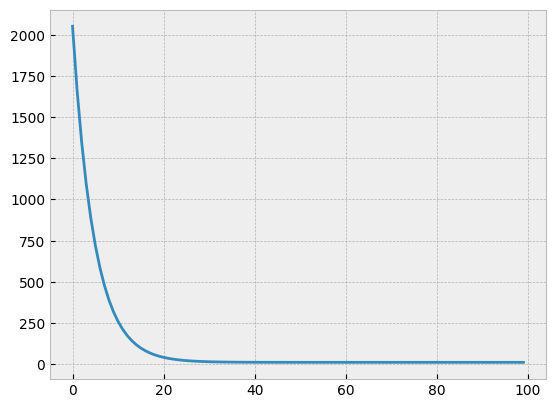

In [38]:
theta = train(X,y)

In [39]:
theta

array([ 3.28268407, 63.81955788])

In [40]:
def predict(X,theta):
  return hypothesis(X,theta)

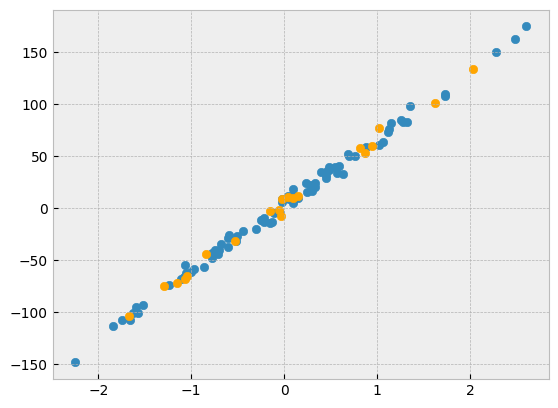

In [41]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="orange")
plt.show()

In [42]:
yp = predict(Xt, theta)

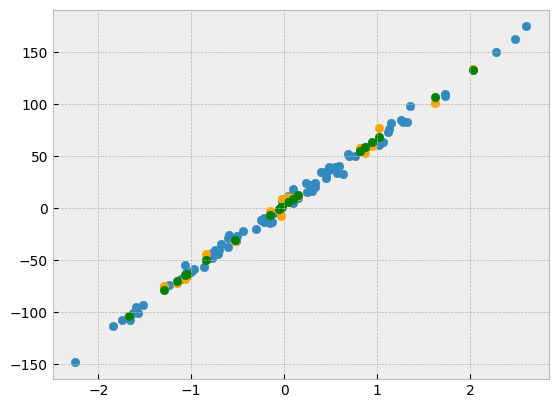

In [43]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="orange")
plt.scatter(Xt,yp,color="green")
#plt.plot(Xt,yp,color="green")
plt.show()

In [44]:
#Model Evaluation
def r2Score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  deno = np.sum((y-ymean)**2)
  return 1-(num/deno)

print(r2Score(yt,yp))

0.9946712769751178


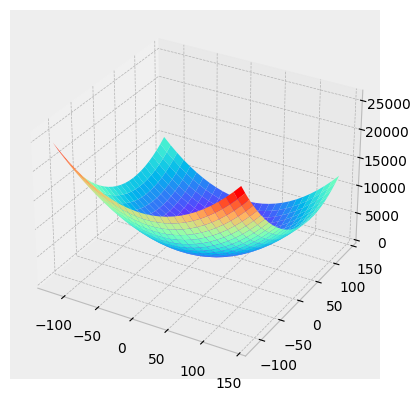

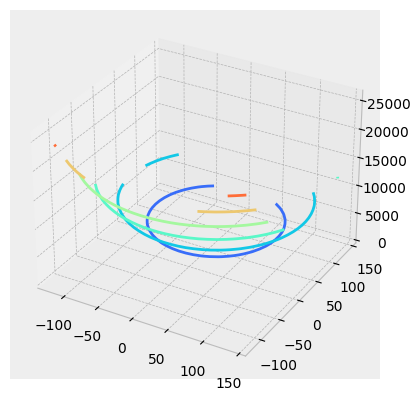

In [45]:
# Visualising the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes = fig.gca()
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes = fig.gca()
plt.show()

In [46]:
def train(X,y,learning_rate = 0.1, maxItrs = 100):
  theta = np.array([-150,100])
  error_list = []
  theta_list = []
  for i in range(maxItrs):
      grad = gradient(X,y,theta)
      error_list.append(error(X,y,theta))
      theta_list.append((theta[0],theta[1]))
      theta[0] -= learning_rate*grad[0]
      theta[1] -= learning_rate*grad[1]

  return theta, theta_list, error_list

In [47]:
theta, theta_list, error_list = train(XT,yT)

In [48]:
theta_list = np.array(theta_list)
error_list = np.array(error_list)

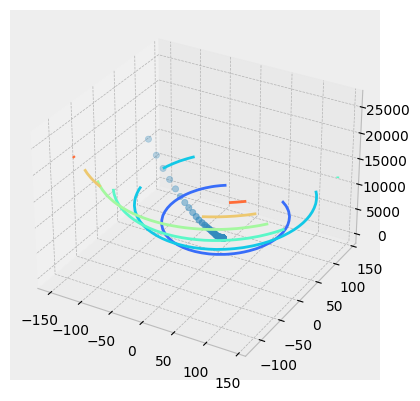

In [49]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
axes = fig.gca()
plt.show()

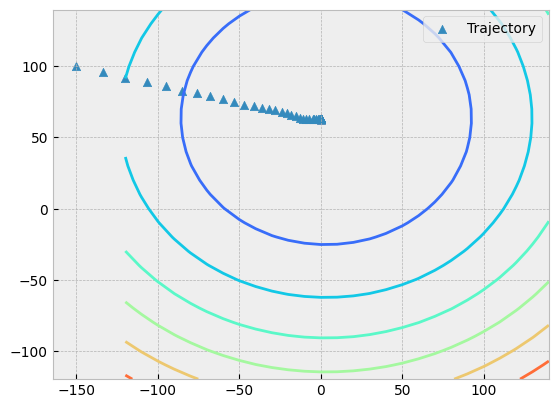

In [50]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label="Trajectory")
plt.legend()
plt.show()